In [6]:
#Dataset Link -  https://drive.google.com/file/d/1d5cLgsku0WUiEupuSIaNWhH3aKpo7shp/view?usp=sharing

import numpy as np
import pandas as pd
import io

In [5]:
from google.colab import files
 
uploaded = files.upload()

Saving scores_data.csv to scores_data.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['scores_data.csv']))
print(df)

         Batch  User_ID     Score   
0    AI_ELITE_7  uid_149       6 / 7
1    AI_ELITE_7  uid_148       6 / 7
2    AI_ELITE_7  uid_147       7 / 7
3    AI_ELITE_7  uid_146       7 / 7
4    AI_ELITE_7  uid_145       4 / 7
..          ...      ...         ...
144  AI_ELITE_4    uid_5       4 / 7
145  AI_ELITE_4    uid_4       4 / 7
146  AI_ELITE_4    uid_3       4 / 7
147  AI_ELITE_4    uid_2       3 / 7
148  AI_ELITE_4    uid_1       2 / 7

[149 rows x 3 columns]


In [9]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [11]:
# Clean the column names ?

df.columns = df.columns.str.replace(' ', '')

In [12]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [17]:
df["Score"] = df['Score'].str.replace(' ', '')

In [25]:
df["Score"] = df["Score"].apply(pd.eval)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


In [26]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,0.857143
1,AI_ELITE_7,uid_148,0.857143
2,AI_ELITE_7,uid_147,1.000000
3,AI_ELITE_7,uid_146,1.000000
4,AI_ELITE_7,uid_145,0.571429


In [28]:
df['Score'] = df['Score'].fillna(df['Score'].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batch    149 non-null    object 
 1   User_ID  149 non-null    object 
 2   Score    149 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


# Analysing the Score Feature

In [30]:
df['Score'].mean()

0.6260786193672099

In [31]:
print(df['Score'].min())

print(df['Score'].max())

0.0
1.0


In [32]:
df['Score'].std()

0.2274570539077162

In [33]:
df['Score'].median()

0.5714285714285714

In [34]:
print(df['Score'].quantile(0.25))

print(df['Score'].quantile(0.75))

0.42857142857142855
0.7142857142857143


<Axes: >

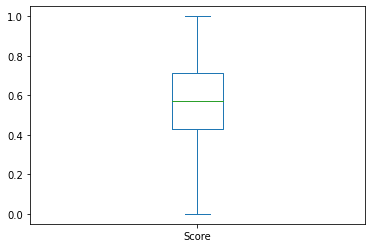

In [35]:
df['Score'].plot(kind='box')

<Axes: >

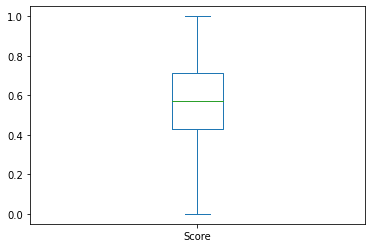

In [36]:
# 1.5 * IQR 

q1 = df['Score'].quantile(0.25)
q3 = df['Score'].quantile(0.75)

IQR = q3 - q1

income_lower_bound = q1 - 1.5 * IQR
income_upper_bound = q3 + 1.5 * IQR

clean_df_2 = df[(df['Score'] >= income_lower_bound) & (df['Score'] <= income_upper_bound)]

clean_df_2['Score'].plot(kind='box')

In [37]:
clean_df_2['Score'].std()

0.2274570539077162

In [38]:
df['Score'].std()

0.2274570539077162

<Axes: ylabel='Density'>

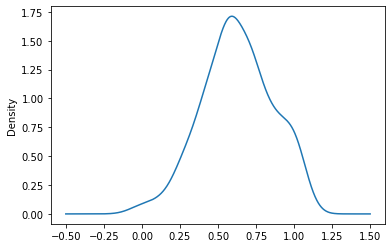

In [39]:
clean_df_2['Score'].plot(kind='kde')

<Axes: ylabel='Density'>

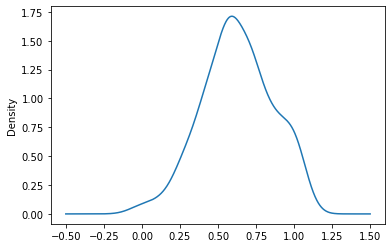

In [40]:
df['Score'].plot(kind='kde')

<Axes: >

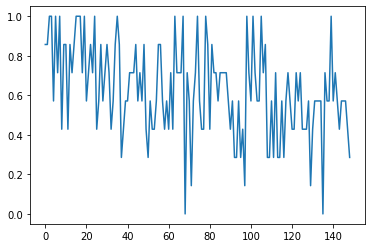

In [42]:
clean_df_2['Score'].plot(kind='line')

<Axes: >

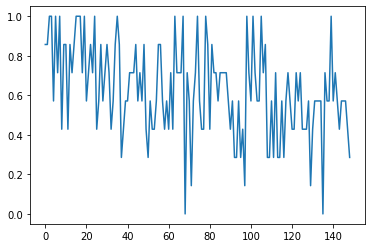

In [43]:
df['Score'].plot(kind='line')

<Axes: >

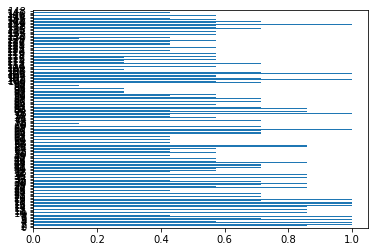

In [44]:
clean_df_2['Score'].plot(kind='barh')

<Axes: >

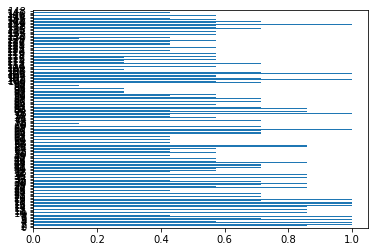

In [45]:
df['Score'].plot(kind='barh')

<Axes: ylabel='Frequency'>

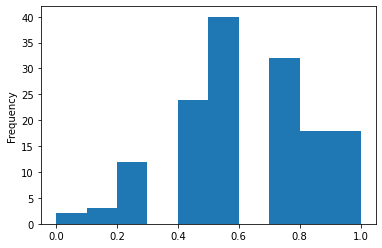

In [46]:
clean_df_2['Score'].plot(kind='hist')

<Axes: ylabel='Frequency'>

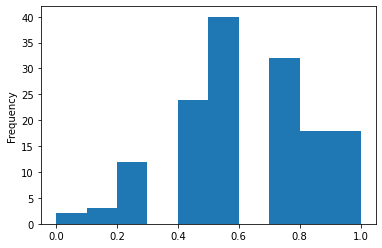

In [47]:
df['Score'].plot(kind='hist')

<Axes: ylabel='Density'>

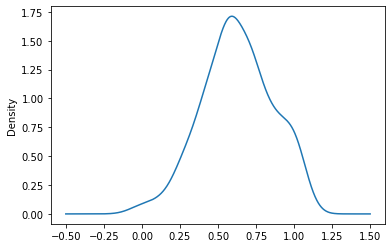

In [48]:
clean_df_2['Score'].plot(kind='density')

<Axes: ylabel='Density'>

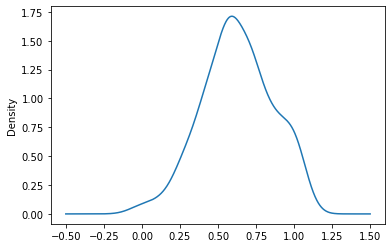

In [49]:
df['Score'].plot(kind='density')

<Axes: >

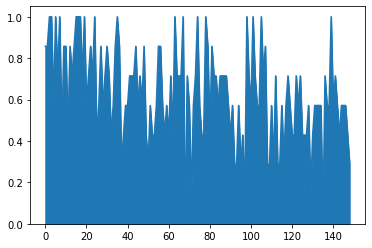

In [50]:
clean_df_2['Score'].plot(kind='area')

<Axes: >

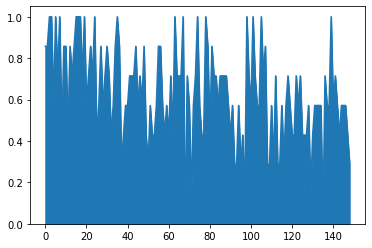

In [51]:
df['Score'].plot(kind='area')

<Axes: ylabel='Score'>

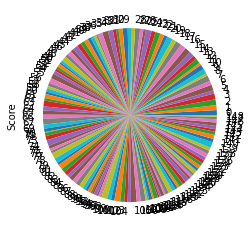

In [52]:
clean_df_2['Score'].plot(kind='pie')

<Axes: ylabel='Score'>

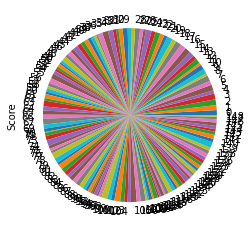

In [53]:
df['Score'].plot(kind='pie')